# Assignment 2-EDA

### Load required packages and import dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno
import plotly.graph_objects as go
%matplotlib inline

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

In [2]:
# Technology Dataset 
df_san = pd.DataFrame(pd.read_csv("311_Service_Requests_-_Sanitation_Code_Complaints_-_Historical.csv"))
print("Sanitation Shape:", df_san.shape)

# Patent Dataset 
df_build = pd.DataFrame(pd.read_csv("311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported_-_Historical.csv"))
print("Building Shape:", df_build.shape)


Technology Shape: (152664, 16)
Patent Shape: (65119, 23)


In [3]:
# The sanitation dataset is largely populated and has a mix of categorical and numeric data
df_san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152664 entries, 0 to 152663
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Creation Date                               152664 non-null  object 
 1   Status                                      152664 non-null  object 
 2   Completion Date                             152482 non-null  object 
 3   Service Request Number                      152664 non-null  object 
 4   Type of Service Request                     152664 non-null  object 
 5   What is the Nature of this Code Violation?  147436 non-null  object 
 6   Street Address                              152664 non-null  object 
 7   ZIP Code                                    152480 non-null  float64
 8   X Coordinate                                152636 non-null  float64
 9   Y Coordinate                                152636 non-null  float64
 

In [4]:
# Nature of violation has 3.5% missing data, but everything else is less than 1%
num_missing = df_san.isnull().sum()
num_missing/len(df_san)*100

Creation Date                                 0.000000
Status                                        0.000000
Completion Date                               0.119216
Service Request Number                        0.000000
Type of Service Request                       0.000000
What is the Nature of this Code Violation?    3.424514
Street Address                                0.000000
ZIP Code                                      0.120526
X Coordinate                                  0.018341
Y Coordinate                                  0.018341
Ward                                          0.002620
Police District                               0.002620
Community Area                                0.002620
Latitude                                      0.018341
Longitude                                     0.018341
Location                                      0.018341
dtype: float64

In [5]:
# Conversion of date fields to datetime 
df_san['Creation Date'] = pd.to_datetime(df_san['Creation Date'])
df_san['Completion Date'] = pd.to_datetime(df_san['Completion Date'])

<AxesSubplot:>

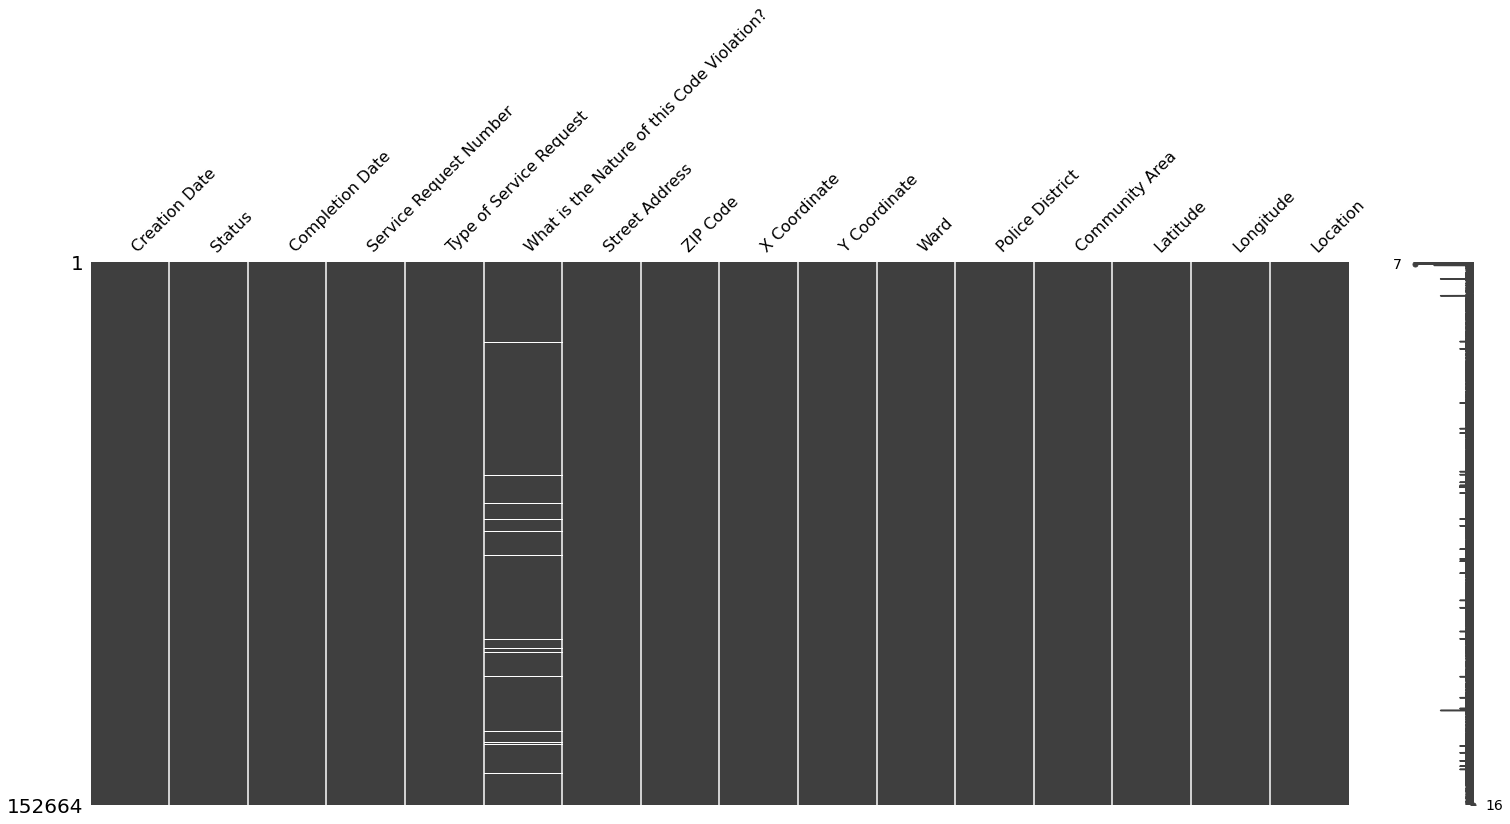

In [6]:
# Gives positional information of the missing values
msno.matrix(df_san)

In [7]:
# Fields of interest: Creation Date, Status, Completion Date, What is the Nature of this Code Violation?, Community Area
df_san.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,2017-08-07,Completed - Dup,2017-10-11,17-05238441,Sanitation Code Violation,Dog feces in yard,1301 S FAIRFIELD AVE,60608.0,1.158238e+06,1.893902e+06,28.0,10.0,29.0,41.864611,-87.694585,"(41.864611197507, -87.69458549863)"
1,2017-09-17,Completed,2017-10-11,17-06208608,Sanitation Code Violation,Overflowing carts,6327 S KENNETH AVE,60629.0,1.147796e+06,1.862217e+06,13.0,8.0,65.0,41.777870,-87.733727,"(41.777870228985, -87.733727348463)"
2,2017-10-05,Completed,2017-10-11,17-06678788,Sanitation Code Violation,Garbage in alley,3020 W MONTROSE AVE,60618.0,1.155359e+06,1.929085e+06,33.0,17.0,14.0,41.961214,-87.704204,"(41.961214454745, -87.704204220358)"
3,2017-08-21,Completed,2017-10-11,17-05591233,Sanitation Code Violation,Garbage in yard,1500 S DAMEN AVE,60608.0,1.163280e+06,1.892714e+06,28.0,12.0,28.0,41.861249,-87.676109,"(41.861249025322, -87.676108920835)"
4,2017-09-23,Completed,2017-10-11,17-06370432,Sanitation Code Violation,Construction Site Cleanliness/Fence,6442 S CENTRAL AVE,60638.0,1.140197e+06,1.861188e+06,13.0,8.0,64.0,41.775189,-87.761614,"(41.775189032012, -87.761613831651)"


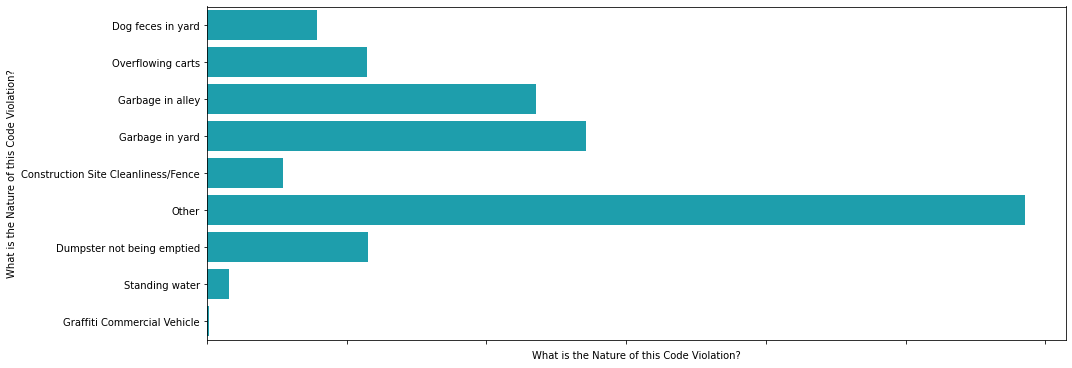

In [13]:
# Review of Nuture of Violation categories 

df_san_bins = df_san[['What is the Nature of this Code Violation?']]


plt.figure(figsize=(15,10))

col = ['What is the Nature of this Code Violation?']

a = 1
for i in range(len(col)):
    plt.subplot(2, 1, a); 
    countplt = sns.countplot(y=df_san_bins[col[i]], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

In [9]:
# create a representation of the year these issues occured with strfmt
df_san['Yearly Creation'] = df_san['Creation Date'].map(lambda dt: dt.strftime('%Y'))
df_san['Yearly Creation'] = df_san['Yearly Creation'].astype(float)

df_san['Yearly Completion'] = pd.to_datetime(df_san['Completion Date'], errors='coerce').dt.strftime('%Y')
df_san['Yearly Completion'] = pd.to_numeric(df_san['Yearly Completion'])

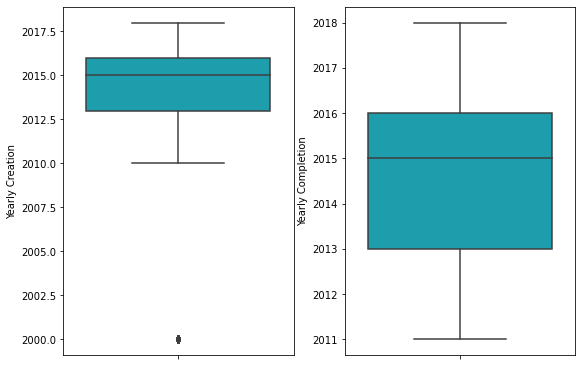

In [10]:
# Box-plot comtaining date info. Creation column has outliers around 2000

df_vis = df_san[['Yearly Creation','Yearly Completion']]

# Layout the whisker plots of the distribution of all 20 numerical variables. 

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 5))
index = 0
axs = axs.flatten()
for k,v in df_vis.items():
    sns.boxplot(y=k, data=df_vis, ax=axs[index],color = '#06b1c4')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:xlabel='time_to_complete', ylabel='Density'>

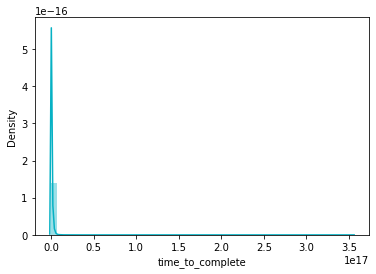

In [11]:
# Clearly some heavy outliers in the time it takes to get issue from created to complete 
df_san['time_to_complete'] =  pd.to_numeric((df_san['Completion Date'] - df_san['Creation Date']))
df_san = df_san[df_san['time_to_complete'] >= 0]  

sns.distplot(df_san['time_to_complete'], color = '#06b1c4')

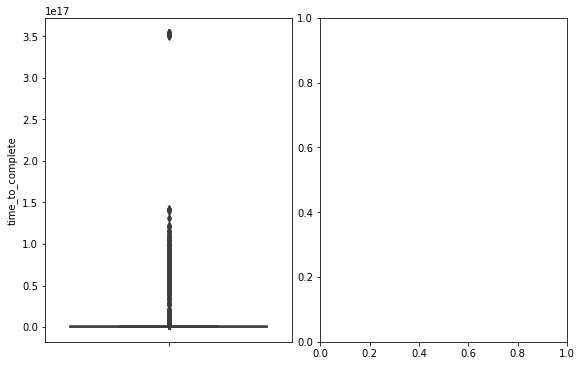

In [12]:
# df_vis dataframe contains 3 numerical columns that are in types of "int" and "float". 

df_vis = df_san[['time_to_complete']]

# Layout the whisker plots of the distribution of all 20 numerical variables. 

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 5))
index = 0
axs = axs.flatten()
for k,v in df_vis.items():
    sns.boxplot(y=k, data=df_vis, ax=axs[index],color = '#06b1c4')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)